In [1]:
from numpy import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import time
import torch as torch
from scipy.stats import norm
torch.set_printoptions(precision=8)
torch.set_default_dtype(torch.float32)
torch.set_default_tensor_type(torch.cuda.FloatTensor)

# Initial version

<font size="3"> $$f(x)=(-1)*sign(x)*x^2$$
   \begin{align}
d X_{t} &= \Big( v(X_{t},\mu_{t}^{X}) + b(t,X_{t}, \mu_{t}^{X})\Big)d t + \sigma(t,X_{t}, \mu_{t}^{X})d W_{t},  \quad X_{0} \in L_{0}^{m}( R^{d}),\\
v(x,\mu)&= \int_{R^{d}  } f(x-y) \mu(dy) ,\qquad b()=0,\qquad \sigma()=\sqrt{2}\\
\end{align}

\begin{align}
\hat{X}_{n+1}^{i,N}& =\hat{X}_{n}^{i,N}
            + v_M(\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) h
            + b(t_n,\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) h
            +\sigma(t_n,\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) \Delta W_{n}^i.
            \\
v_M(\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n)&= \frac{ v_M }{1+M^{-\alpha}|v_M|}
\qquad \alpha \in(0,\frac{1}{2}],
\quad 
  \hat{\mu}^{X,N}_n(dx):= \frac1N \sum_{j=1}^N \delta_{X_{n}^{j,N}}(dx).
\nonumber
\end{align}
$$f(x)=(-1)*sign(x)*x^2$$
\begin{align}
x_{n+1}&=x_n-\frac{g(x_n) }{g'(x_n)}\\
g(y_i)&=y_i-h\cdot\frac{1}{N}\sum_{j=1}^N f(y_i-y_j)-x_n^{(i)}    \qquad \qquad g'(y_i)=1-h\cdot\frac{1}{N}\sum_{j=1}^N f'(y_i-y_j)
\end{align}

In [ ]:
# v_M(\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n)&=\frac{1}{N} \sum_{j=1}^N \frac{f(\hat{X}_{n}^{i,N}-\hat{X}_{n}^{j,N})}{1+M^{-\alpha} |f(\hat{X}_{n}^{i,N}-\hat{X}_{n}^{j,N})|} , 

## Methods

In [ ]:
np.sqrt(2)

1.4142135623730951

<font size="4"> 

In [2]:
def torch_make_brownian_motion(bm,h):  # Update BM, push it into h future.
    hh=np.sqrt(h)
#     bm+=hh*np.random.normal(0,1,size=(len(bm)))
    bm+=hh*torch.randn(len(bm), dtype=torch.float64)
    return(0)

def make_brownian_motion(bm,h):  # Update BM, push it into h future.
    hh=np.sqrt(h)
    for i in range(len(bm)):
        rrr=hh*np.random.normal(0,1)
        bm[i]+=rrr 
    return(0)

def fff(a,b):
    c=a-b
    cc= -1*(c**3)
    return(cc)

def torch_fff(a,b):
    c=a-b
    cc= -1*(c**3)
    return(cc)


def fp(a,b):
    return(-3*(a-b)**2)

def torch_fp(a,b):
    return(-3*(a-b)**2)




def torch_taming_method(x,bm,h,T,N):     ## x[0,:] is BM information, x[1.:] is particle's information  
    n=len(bm)
    alpha=1.0
    M=T/h
    mma=M**(-alpha)
    sigma=1
    
    # print('xxx')
    sample_vre = torch.reshape(x[1,:N],(N,1))
    nominator_tmp = sample_vre-x[1,:N]
    nom_tmp =  -(nominator_tmp**2)*torch.sign(nominator_tmp )  
    norm0 = torch.mean(nom_tmp,1)
    diff=1.4142135623730951


    dWt=bm[:N]-x[0,:N]
    x[0,:N]=bm[:N]
    x[1,:N]=x[1,:N] + h*norm0/(1+mma*torch.abs(norm0)) + ( diff)*dWt
    return(0)



def torch_ssm_method(x,bm,h,T,N): 
    
    alpha=0.5
    M=int(T/h)
    sigma=1
    y = x.detach().clone()
    sqrth=math.sqrt(h)
    pd=True
    while pd:
        sample_vre = torch.reshape(y[1,:N],(N,1))
        
        nominator_tmp = sample_vre-y[1,:N]
        nom_tmp =  -(nominator_tmp**2)*torch.sign(nominator_tmp )
        vy = torch.mean(nom_tmp,1)
        
        nom_tmp =   -torch.abs(nominator_tmp)
        vyprime = torch.mean(nom_tmp,1)
        
        upper=(vy*h-y[1,:N]+x[1,:N])

        fovergprime=upper/(h*vyprime-1)
        y[1,:N]+= -fovergprime
        if (torch.max(upper))<=sqrth and (torch.min(upper))>=-sqrth:     pd=False
            #print( max(np.abs(fovergprime)) )

    dWt=bm[:N]-x[0,:N]
    x[0,:N]=bm[:N]
    x[1,:N]=y[1,:N]+ 1.4142135623730951*dWt
    return(0)


def torch_ssm2_method(x,bm,h,T,N): 
    
    alpha=0.5
    M=int(T/h)
    sigma=1
    y = x.detach().clone()
    sqrth=math.sqrt(h)
    pd=True
    while pd:
        sample_vre = torch.reshape(y[1,:N],(N,1))
        
        nominator_tmp = sample_vre-y[1,:N]
        nom_tmp =  -(nominator_tmp**2)*torch.sign(nominator_tmp )
        vy = torch.mean(nom_tmp,1)
        
        nom_tmp =   -torch.abs(nominator_tmp)
        vyprime = torch.mean(nom_tmp,1)
        
        upper=(vy*h-y[1,:N]+x[1,:N])

        fovergprime=upper/(h*vyprime-1)
        y[1,:N]+= -fovergprime
        if (torch.max(fovergprime))<=1 and (torch.min(fovergprime))>=-1:     pd=False
            #print( max(np.abs(fovergprime)) )

    dWt=bm[:N]-x[0,:N]
    x[0,:N]=bm[:N]
    x[1,:N]=y[1,:N]+ 1.4142135623730951*dWt
    return(0)




In [ ]:
torch.sign(torch.randn(2, dtype=torch.float64))*torch.randn(2, dtype=torch.float64)

tensor([-0.03728797,  0.09727966], dtype=torch.float64)

In [3]:
def save_information(method_value_list,method_names_list):
    n_of_schemes=len(method_names_list)
    n_of_particles=len(method_value_list[0])
    infor_list=[]
    for i in range(n_of_schemes):
        print(i)
        for j in range(n_of_particles):
            infor_list.append( [ method_value_list[i][j][1] , method_names_list[i] ]  )
#         names[i+2*N]=r'Taming $version 2$'

    return(infor_list)

def selected_examples(value,newvalue,newnames,low,up):
    for i  in range(len(value)):
        if value[i][0]>=low and value[i][0]<=up:
            newvalue.append(value[i][0])
            newnames.append(value[i][1])
    return(0)
#Ready for the dis plot.

def torch_save_information(method_value_list,method_names_list):   #[n_of_schemes][n_of_paticles][values] ; [schmes'names]
    n_of_schemes=len(method_names_list)
    n_of_particles=len(method_value_list[0][1])
    infor_list=[]
    infor_list=torch.zeros( n_of_schemes*n_of_particles,2, dtype=torch.float32)
    count=0
    for i in range(n_of_schemes):
        print(i)
        for j in range(n_of_particles):
            infor_list[count][0]=method_value_list[i][1][j]
            infor_list[count][1]=method_names_list[i]
            count+=1
 
    return(infor_list)

def torch_selected_examples(value,newvalue,newnames,newtimes,low,up):  # Split the [n][value/names] list into two lists.
    for i  in range(len(value)):
        if value[i][0]>=low and value[i][0]<=up:
            newvalue.append(value[i][0])
            newnames.append(value[i][1])
            newtimes.append(value[i][2])
    return(0)


In [4]:
def calculation_strong_error(exact,approx):
    n=len(exact[1])
    strong_error=0
    for i in range(n):
        strong_error+=(exact[1][i]-approx[1][i])**2
    strong_error=np.sqrt(strong_error/n)
    return(strong_error.item())

def calculation_weak_error(exact,approx):
    n=len(exact[1])
    weak_error=0
    for i in range(n):
        weak_error+=(exact[1][i]-approx[1][i])
    weak_error=abs(weak_error/n)
    return(weak_error.item())

def calculation_path_error(prev,exact,approx):
    aaaa=(exact[1]-approx[1])**2
    prev=torch.max( prev,aaaa)
    return( prev)

In [ ]:
np.random.binomial(1,0.5)

0

## Simulation-torch for errors.

In [5]:
# Compare of different scheme. test part.

# hmin=1e-4, N=100, ada,taming,ssm, without adaptive.

T=1
M=int(1e4)
h=1e-4
n=1000
N=n
round_scheme=10

# h_of_scheme=[1e-5,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
# n_of_scheme=len(h_of_scheme)

h_of_scheme=[1e-4,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
n_of_scheme=len(h_of_scheme)





particle_adaptive=torch.zeros(n_of_scheme,2,N)
measure_ada=[ [ 0 for i in range(n)   ] for k in range(n_of_scheme)  ]



timestep=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
moder=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
for i in range(len(moder)):
    moder[i]=int(moder[i]*(1e4))

nmoder=len(moder)



#trigger=[ [ 0 for k in range(n_of_scheme)  ] for i in range(n)   ]
bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

time_ssm=np.zeros(nmoder)
time_ssm2=np.zeros(nmoder)
time_tam=np.zeros(nmoder)

particle_taming_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_taming_exact2=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_euler_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_taming_method1=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_taming_method2=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_split_step_method1=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_split_step_method2=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_euler_method=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')


path_diff_ssm=torch.zeros(nmoder,N, dtype=torch.float32,  device='cuda')
path_diff_tam=torch.zeros(nmoder,N, dtype=torch.float32,  device='cuda')



#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(2,4)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    #xxx000=np.random.binomial(1,0.5)*101-1
    particle_taming_exact1[1][i]=xxx000
    particle_taming_exact2[1][i]=xxx000
    particle_split_step_exact2[1][i]=xxx000
    particle_split_step_exact1[1][i]=xxx000
    particle_euler_exact1[1][i]=xxx000
    
        
    for j in range(nmoder):
        particle_taming_method1[j][1][i]=xxx000
        particle_taming_method2[j][1][i]=xxx000
        particle_split_step_method1[j][1][i]=xxx000
        particle_euler_method[j][1][i]=xxx000
        

xxx=0
M=int(1/h)
# T=0.001
T=1
for ii in range(1,M*T+1):
# for ii in range(1,10+1):
    time_end=round(ii*h,round_scheme)
    if ii%1000==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_taming_method(particle_taming_exact1,bm,h,T,N)
    torch_ssm2_method(particle_split_step_exact1,bm,h,T,N)
    #euler_method(particle_euler_exact1,bm,0.001,T)
    #taming_method_version2(particle_taming_exact2,bm,0.001,T)
    for j in range(len(moder)):
        if (ii%moder[j]==0):
            t1=time.time()
            torch_taming_method(particle_taming_method1[j],bm,timestep[j],T,N)
            t2=time.time()
            torch_ssm2_method(particle_split_step_method1[j],bm,timestep[j],T,N)
            t3=time.time()
            # torch_ssm2_method(particle_split_step_method2[j],bm,timestep[j],T,N)
            t4=time.time()
            time_ssm2[j]+=t4-t3
            time_ssm[j]+=t3-t2
            time_tam[j]+=t2-t1
            path_diff_ssm[j]=calculation_path_error(path_diff_ssm[j], particle_split_step_exact1 ,particle_split_step_method1[j] )
            path_diff_tam[j]=calculation_path_error(path_diff_tam[j], particle_taming_exact1 ,particle_taming_method1[j] )

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
time_tam

array([0.20679069, 0.10641623, 0.04098701, 0.02060604, 0.01078558,
       0.00398231, 0.00202417])

In [ ]:
time_ssm

array([0.36261535, 0.1804533 , 0.07113504, 0.03683758, 0.01887107,
       0.00832415, 0.00555301])

In [ ]:
time_ssm2

array([5.68151474e-04, 2.68459320e-04, 1.10626221e-04, 6.03199005e-05,
       2.71797180e-05, 1.09672546e-05, 5.48362732e-06])

### Calculation of errors and plots


In [ ]:

particle_taming_exact1=particle_taming_exact1.to( "cpu")
particle_taming_exact2=particle_taming_exact2.to( "cpu")
particle_split_step_exact1=particle_split_step_exact1.to( "cpu")

particle_taming_method1=particle_taming_method1.to( "cpu")
particle_taming_method2=particle_taming_method2.to( "cpu")
particle_split_step_method1=particle_split_step_method1.to( "cpu")

 ## calculation of the errors
strong_error_taming1=np.zeros( (nmoder) )
strong_error_taming2=np.zeros( (nmoder) )
strong_error_split_step1=np.zeros( nmoder )

for i in range(nmoder):
    strong_error_taming1[i]=calculation_strong_error(particle_taming_exact1,particle_taming_method1[i])
    strong_error_taming2[i]=calculation_strong_error(particle_taming_exact2,particle_taming_method2[i])
    strong_error_split_step1[i]=calculation_strong_error(particle_split_step_exact1,particle_split_step_method1[i])

weak_error_taming1=np.zeros( (nmoder) )
weak_error_taming2=np.zeros( (nmoder) )
weak_error_split_step1=np.zeros( (nmoder) )

for i in range(nmoder):
    weak_error_taming1[i]=calculation_weak_error(particle_taming_exact1,particle_taming_method1[i])
    weak_error_taming2[i]=calculation_weak_error(particle_taming_exact2,particle_taming_method2[i])
    weak_error_split_step1[i]=calculation_weak_error(particle_split_step_exact1,particle_split_step_method1[i])

In [ ]:
strong_error_split_step1,strong_error_taming1

(array([0.00080567, 0.00164604, 0.00425492, 0.00801946, 0.01462945,
        0.03875333, 0.09434032]),
 array([0.00241884, 0.00511845, 0.01323242, 0.02718844, 0.05644482,
        0.1691917 , 0.50200361]))

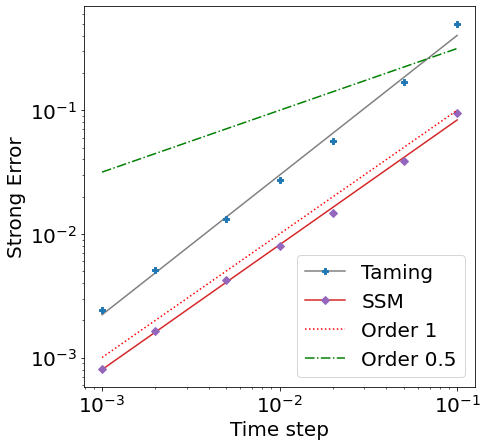

In [ ]:
# make graphs.
from matplotlib import pyplot
timestep=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
plt.rcParams['font.size'] = '20'
plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time step')  
plt.ylabel('Strong Error') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)

m1, b1 = np.polyfit(np.log(timestep),np.log(strong_error_taming1),1)
a,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b,=plt.plot(timestep,strong_error_taming1,'P',color='C0')

# m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_taming2),1)
# c,=plt.plot(timestep, (timestep**m2)*np.exp(b2) )
# d,=plt.plot(timestep,strong_error_taming2,'s')

# m3, b3 = np.polyfit(np.log(timestep),np.log(strong_error_adaptive),1)
# e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
# f,=plt.plot(timestep,strong_error_adaptive,'o',color='C1')

# m4, b4 = np.polyfit(np.log(timestep),np.log(strong_error_splitting),1)
# g,=plt.plot(timestep, (timestep**m4)*np.exp(b4),color='blue' )
# h,=plt.plot(timestep,strong_error_splitting,'v',color='C2')

m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_split_step1),1)
j,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='C3' )
k,=plt.plot(timestep,strong_error_split_step1,'D',color='C4')



#g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
z,=plt.plot(timestep, (timestep**1),':',label='Order 1',color='red')
z2,=plt.plot(timestep, (timestep**0.5),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##

plt.legend([(a,b),(j,k),z,z2],['Taming',r'SSM','Order 1','Order 0.5'])
plt.savefig('FIG-0531-gm-se.png', dpi=100)

In [ ]:
a=3
particle_split_step_exact1[1][a],particle_split_step_method1[4][1][a],particle_split_step_method1[6][1][a]

(tensor(2.1548640391916916),
 tensor(2.1666037119664563),
 tensor(2.2264194203210526))

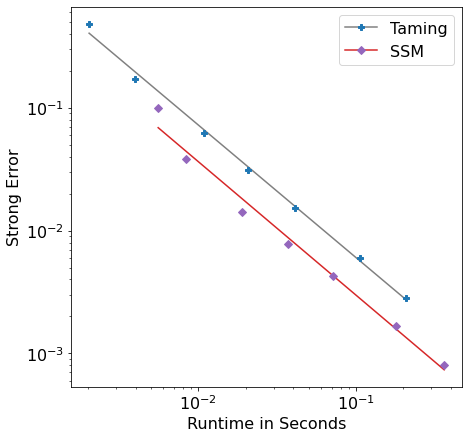

In [ ]:
# make graphs.
from matplotlib import pyplot
timestep=[0.1,0.2,0.5,1,2,5,10,20,50,100,200]
plt.rcParams['font.size'] = '16'
plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Runtime in Seconds')  
plt.ylabel('Strong Error') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)

m1, b1 = np.polyfit(np.log(time_tam),np.log(strong_error_taming1),1)
a,=plt.plot(time_tam, (time_tam**m1)*np.exp(b1),color='grey' )
b,=plt.plot(time_tam,strong_error_taming1,'P',color='C0')

# m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_taming2),1)
# c,=plt.plot(timestep, (timestep**m2)*np.exp(b2) )
# d,=plt.plot(timestep,strong_error_taming2,'s')

# m3, b3 = np.polyfit(np.log(timestep),np.log(strong_error_adaptive),1)
# e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
# f,=plt.plot(timestep,strong_error_adaptive,'o',color='C1')

# m4, b4 = np.polyfit(np.log(timestep),np.log(strong_error_splitting),1)
# g,=plt.plot(timestep, (timestep**m4)*np.exp(b4),color='blue' )
# h,=plt.plot(timestep,strong_error_splitting,'v',color='C2')

m2, b2 = np.polyfit(np.log(time_ssm),np.log(strong_error_split_step1),1)
j,=plt.plot(time_ssm, (time_ssm**m2)*np.exp(b2),color='C3' )
k,=plt.plot(time_ssm,strong_error_split_step1,'D',color='C4')


# #g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
# z,=plt.plot(timestep, (timestep**1),':',label='Order 1',color='red')
# z2,=plt.plot(timestep, (timestep**0.5),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##

plt.legend([(a,b),(j,k)],['Taming',r'SSM'])
plt.savefig('FIG-0622-gm-time.png', dpi=100)

In [7]:
 ## calculation of the path errors
strong_error_taming1=np.zeros( (nmoder) )
strong_error_taming2=np.zeros( (nmoder) )
strong_error_split_step1=np.zeros( nmoder )

for i in range(nmoder):
    strong_error_taming1[i]= np.sqrt(torch.mean(path_diff_tam[i]).item())
 
    strong_error_split_step1[i]=np.sqrt(torch.mean(path_diff_ssm[i]).item())


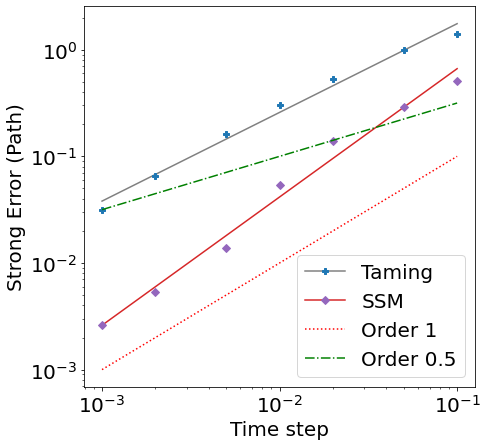

In [9]:
# make graphs.
from matplotlib import pyplot
timestep=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
plt.rcParams['font.size'] = '20'
plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time step')  
plt.ylabel('Strong Error (Path)') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)

m1, b1 = np.polyfit(np.log(timestep),np.log(strong_error_taming1),1)
a,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b,=plt.plot(timestep,strong_error_taming1,'P',color='C0')

# m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_taming2),1)
# c,=plt.plot(timestep, (timestep**m2)*np.exp(b2) )
# d,=plt.plot(timestep,strong_error_taming2,'s')

# m3, b3 = np.polyfit(np.log(timestep),np.log(strong_error_adaptive),1)
# e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
# f,=plt.plot(timestep,strong_error_adaptive,'o',color='C1')

# m4, b4 = np.polyfit(np.log(timestep),np.log(strong_error_splitting),1)
# g,=plt.plot(timestep, (timestep**m4)*np.exp(b4),color='blue' )
# h,=plt.plot(timestep,strong_error_splitting,'v',color='C2')

m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_split_step1),1)
j,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='C3' )
k,=plt.plot(timestep,strong_error_split_step1,'D',color='C4')



#g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
z,=plt.plot(timestep, (timestep**1),':',label='Order 1',color='red')
z2,=plt.plot(timestep, (timestep**0.5),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##

plt.legend([(a,b),(j,k),z,z2],['Taming',r'SSM','Order 1','Order 0.5'])
plt.savefig('FIG-0707-gm-sepath.png', dpi=100)

In [ ]:
# 

# PoC


In [ ]:
T=1
d=2
M=int(1e4)
h=1e-3



n_of_scheme=[40,80,160,320,640,1280]
nmoder=len(n_of_scheme)
N=2560
n=N



#trigger=[ [ 0 for k in range(n_of_scheme)  ] for i in range(n)   ]
bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

time_ssm=np.zeros(nmoder)
time_tam=np.zeros(nmoder)

particle_taming_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_taming_exact2=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_euler_exact1=torch.zeros(2,N, dtype=torch.float32,  device='cuda')
particle_taming_method1=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_taming_method2=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_split_step_method1=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_split_step_method2=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')
particle_euler_method=torch.zeros(nmoder,2,N, dtype=torch.float32,  device='cuda')

#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(2,3)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    #xxx000=np.random.binomial(1,0.5)*101-1
    particle_taming_exact1[1][i]=xxx000
    particle_taming_exact2[1][i]=xxx000
    particle_split_step_exact2[1][i]=xxx000
    particle_split_step_exact1[1][i]=xxx000
    particle_euler_exact1[1][i]=xxx000
    
        
    for j in range(nmoder):
        particle_taming_method1[j][1][i]=xxx000
        particle_taming_method2[j][1][i]=xxx000
        particle_split_step_method1[j][1][i]=xxx000
        particle_euler_method[j][1][i]=xxx000
        

xxx=0
M=int(1/h)
# T=0.001
T=1
for ii in range(1,M*T+1):
# for ii in range(1,10+1):
    if ii%1000==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_taming_method(particle_taming_exact1,bm,h,T,N)
    torch_ssm2_method(particle_split_step_exact1,bm,h,T,N)
    #euler_method(particle_euler_exact1,bm,0.001,T)
    #taming_method_version2(particle_taming_exact2,bm,0.001,T)
    for j in range(nmoder):
          t1=time.time()
          torch_taming_method(particle_taming_method1[j],bm,h,T,n_of_scheme[j])
          t2=time.time()
          torch_ssm2_method(particle_split_step_method1[j],bm,h,T,n_of_scheme[j])
          t3=time.time()
            # time_ssm[j]+=t3-t2
            # time_tam[j]+=t2-t1

1000


In [ ]:
meanlist=[]
d=1
for j in (range(len(n_of_scheme))):
    nn=n_of_scheme[j]
    a1=torch.mean( (particle_taming_method1[j][1][:nn].reshape(d*nn,1)-particle_taming_exact1[1][:nn].reshape(d*nn,1))**2 )
    a1=torch.sqrt(a1)  
    a3=torch.mean( (particle_split_step_method1[j][1][:nn].reshape(d*nn,1)-particle_split_step_exact1[1][:nn].reshape(d*nn,1))**2 )
    a3=torch.sqrt(a3)
    meanlist.append([a1,a3])

strong_error_split_step1=[]
strong_error_taming1=[]

for i in range(len(meanlist)):
  strong_error_taming1.append(meanlist[i][0].item())
  strong_error_split_step1.append(meanlist[i][1].item())

In [ ]:
particle_taming_method1[0][1],particle_split_step_method1[0][1]

(tensor([2.54856634, 1.42298698, 1.13657367,  ..., 5.60351562, 6.46584749,
         4.62828970]),
 tensor([2.54612613, 1.42075884, 1.13397396,  ..., 5.60351562, 6.46584749,
         4.62828970]))

In [ ]:
particle_taming_exact1[1]

tensor([1.18525863, 0.89987057, 1.84154010,  ..., 1.63239539, 2.47838688,
        0.35167882])

In [ ]:
strong_error_split_step1,strong_error_taming1

([0.48877066373825073,
  0.3739318549633026,
  0.2640223205089569,
  0.17186371982097626,
  0.11404567211866379,
  0.03012840636074543],
 [0.48788005113601685,
  0.3740403354167938,
  0.2638074457645416,
  0.1719067245721817,
  0.11395958811044693,
  0.03017759881913662])

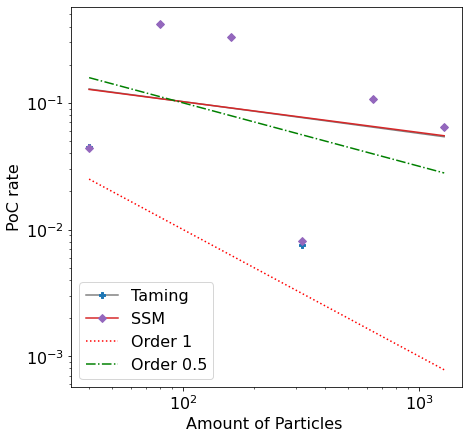

In [ ]:
# make graphs.
from matplotlib import pyplot
timestep=n_of_scheme
plt.rcParams['font.size'] = '16'
plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Amount of Particles ')  
plt.ylabel('PoC rate') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)

m1, b1 = np.polyfit(np.log(timestep),np.log(strong_error_taming1),1)
a,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b,=plt.plot(timestep,strong_error_taming1,'P',color='C0')

# m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_taming2),1)
# c,=plt.plot(timestep, (timestep**m2)*np.exp(b2) )
# d,=plt.plot(timestep,strong_error_taming2,'s')

# m3, b3 = np.polyfit(np.log(timestep),np.log(strong_error_adaptive),1)
# e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
# f,=plt.plot(timestep,strong_error_adaptive,'o',color='C1')

# m4, b4 = np.polyfit(np.log(timestep),np.log(strong_error_splitting),1)
# g,=plt.plot(timestep, (timestep**m4)*np.exp(b4),color='blue' )
# h,=plt.plot(timestep,strong_error_splitting,'v',color='C2')

m2, b2 = np.polyfit(np.log(timestep),np.log(strong_error_split_step1),1)
j,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='C3' )
k,=plt.plot(timestep,strong_error_split_step1,'D',color='C4')



#g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
z,=plt.plot(timestep, (1/timestep),':',label='Order 1',color='red')
z2,=plt.plot(timestep, (timestep**(-0.5)),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##

plt.legend([(a,b),(j,k),z,z2],['Taming',r'SSM','Order 1','Order 0.5'])
plt.savefig('FIG-0622-gm-poc.png', dpi=100)

## Density, without ada, torch
    

In [ ]:
def torch_save_information(method_value_list,method_names_list,ttt):   #[n_of_schemes][n_of_paticles][values] ; [schmes'names]
    n_of_schemes=len(method_names_list)
    n_of_particles=len(method_value_list[0][1])
    infor_list=[]
    # infor_list=torch.zeros( n_of_schemes*n_of_particles,2, dtype=torch.float32)
    count=0
    for i in range(n_of_schemes):
        # print(i)
        for j in range(n_of_particles):
            # infor_list[count][0]=method_value_list[i][1][j]
            # infor_list[count][1]=method_names_list[i]

            infor_list.append([ method_value_list[i][1][j].item(), method_names_list[i] ,ttt])

            count+=1
 
    return(infor_list)

def torch_selected_examples(value,low,up):  # Split the [n][value/names] list into two lists.
    n1=len(value)
    n2=len(value[0])
    
    newvalue=[]
    newnames=[]
    newtimes=[]
    
    for i  in range(n1):
      for j in range(n2):
        if value[i][j][0]>=low and value[i][j][0]<=up:
            newvalue.append(value[i][j][0])
            newnames.append(value[i][j][1])
            newtimes.append(value[i][j][2])
    return( newvalue,newnames,newtimes )


In [ ]:
np.random.binomial(1,0.5)

0

### test 1


In [ ]:
# Compare of different scheme. test part.

# hmin=1e-2, N=1000, taming,ssm, without adaptive.


# torch.manual_seed(314)
torch.manual_seed(3133)

T=1
M=int(1e4)
h=1e-2
n_of_scheme=8
n=1000
N=n
round_scheme=10



bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

bm_time_now=0
bm_time_trigger=[ 10000 for k in range(n_of_scheme) ]

particle_taming_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_taming_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_euler_exact1=torch.zeros(2,N, dtype=torch.float64)


#Inital distribution.
for i in range(n):
    # xxx000=np.random.normal(4,4)
    xxx000=np.random.normal(0,1)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    # xxx000=np.random.binomial(1,0.5)*100
    particle_taming_exact1[1][i]=xxx000
    particle_taming_exact2[1][i]=xxx000
    particle_split_step_exact2[1][i]=xxx000
    particle_split_step_exact1[1][i]=xxx000
    particle_euler_exact1[1][i]=xxx000
    

        

xxx=0
M=int(1/h)
info_time=[]
ttii=[100,300,1000,3000,5000,8000,10000]
# ttii=[3000,8000,10000,12000,15000,18000,20000]
# ttii=[3000,8000,10000]


# torch.manual_seed(3141)
torch.manual_seed(3143)

T=10

# for ii in range(1,20000+1):
for ii in range(1,1000+1):
    time_end=round(ii*h,round_scheme)
    if ii%200==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_taming_method(particle_taming_exact1,bm,h,T,N)
    torch_ssm_method(particle_split_step_exact1,bm,h,T,N)
    
    if ii in ttii: 
        ttt=ii//100
        method_value=[particle_taming_exact1,particle_split_step_exact1]
        method_names=[ 'Taming','SSM' ]
        info_time.append(torch_save_information(method_value,method_names,ttt)) 

 


200
400
600
800
1000


In [ ]:
max(info_time[1])

[tensor(8308.58335013, dtype=torch.float64), 'Taming v.1', 3]

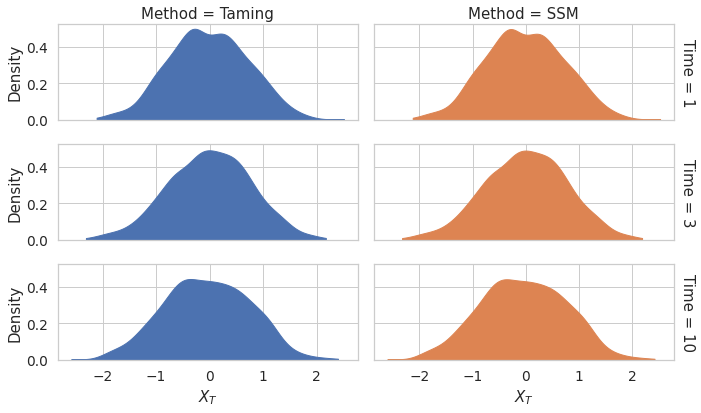

In [ ]:
#B(100,1), T=1,2,10
 
   
newvalue,newnames,newtime=torch_selected_examples(info_time,-30,80)



#sns.plotting_context("notebook", font_scale=5.5)
plt.rcParams['font.size'] = '64'
data = {'Method': newnames, r'$X_T$': newvalue, 'Time': newtime }
df2 = pd.DataFrame(data)
# set seaborn whitegrid theme
sns.set(style="whitegrid",font_scale=1.25)

d = {'color': ['C0', 'C1']}

g = sns.FacetGrid(df2, col="Method",row="Time", hue="Method", margin_titles=True,sharex='col',sharey=True, despine=False,hue_kws=d, height=2, aspect=2.5)
# draw density plots
g = g.map(sns.kdeplot,r'$X_T$', cut=0, fill=True, common_norm=False,alpha=1,  legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()
g.tight_layout()
g.savefig("FIG-220531-N01-gm.png")

In [ ]:
1 in [0,1,2]

True

In [ ]:
random.poisson(10)

11

### test 2


In [ ]:
# Compare of different scheme. test part.
# torch.manual_seed(314)
torch.manual_seed(3133)

T=1
M=int(1e4)
h=1e-2
n=1000
N=n




bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

bm_time_now=0
bm_time_trigger=[ 10000 for k in range(n_of_scheme) ]

particle_taming_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_taming_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_euler_exact1=torch.zeros(2,N, dtype=torch.float64)


#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(2,4)
    # xxx000=random.poisson(10)
    # xxx000=np.random.normal(0,1)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    # xxx000=np.random.binomial(1,0.5)*50
    particle_taming_exact1[1][i]=xxx000
    particle_taming_exact2[1][i]=xxx000
    particle_split_step_exact2[1][i]=xxx000
    particle_split_step_exact1[1][i]=xxx000
    particle_euler_exact1[1][i]=xxx000
    

        

xxx=0
M=int(1/h)
info_time=[]
ttii=[100,300,1000,3000,5000,8000,10000]
# ttii=[3000,8000,10000,12000,15000,18000,20000]
# ttii=[3000,8000,10000]


# torch.manual_seed(3141)
torch.manual_seed(3143)

T=10

# for ii in range(1,20000+1):
for ii in range(1,1000+1):
    time_end=round(ii*h,round_scheme)
    if ii%200==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_taming_method(particle_taming_exact1,bm,h,T,N)
    torch_ssm_method(particle_split_step_exact1,bm,h,T,N)
    

    if ii in ttii: 
        ttt=ii//100
        method_value=[particle_taming_exact1,particle_split_step_exact1]
        method_names=[ 'Taming','SSM' ]
        info_time.append(torch_save_information(method_value,method_names,ttt)) 

 


200
400
600
800
1000


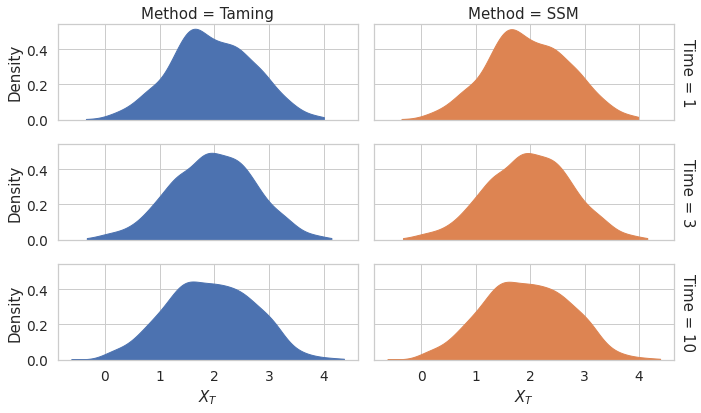

In [ ]:
#B(100,1), T=1,2,10
 
    
newvalue,newnames,newtime=torch_selected_examples(info_time,-30,80)



#sns.plotting_context("notebook", font_scale=5.5)
plt.rcParams['font.size'] = '64'
data = {'Method': newnames, r'$X_T$': newvalue, 'Time': newtime }
df2 = pd.DataFrame(data)
# set seaborn whitegrid theme
sns.set(style="whitegrid",font_scale=1.25)

d = {'color': ['C0', 'C1']}

g = sns.FacetGrid(df2, col="Method",row="Time", hue="Method", margin_titles=True,sharex='col',sharey=True, despine=False,hue_kws=d, height=2, aspect=2.5)
# draw density plots
g = g.map(sns.kdeplot,r'$X_T$', cut=0, fill=True, common_norm=False,alpha=1,  legend=False)

# control the title of each facet
g = g.set_titles("{col_name}",fontsize=30)

# show the graph
plt.show()
g.tight_layout()
g.savefig("FIG-220531-N24-gm.png")